In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torchvision
from torchvision import datasets, transforms
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
hf_bb1 = h5py.File('data/jetimages_BlackBox1.h5', "r")
hf_rnd = h5py.File('data/jetimages_rnd.h5','r')

# Make some example plots of signal and background events

In [4]:
list(hf_rnd.keys())

['j1_images', 'j2_images', 'jet_infos']

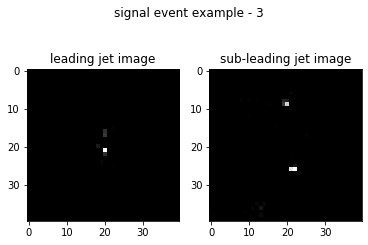

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(hf_rnd['j1_images'][19],cmap='gray')
ax1.set_title('leading jet image')
ax2.imshow(hf_rnd['j2_images'][19],cmap='gray')
ax2.set_title('sub-leading jet image')
fig.suptitle('signal event example - 3')
plt.savefig('signal_event_example_3.png')

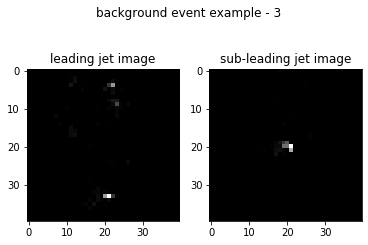

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(hf_rnd['j1_images'][2],cmap='gray')
ax1.set_title('leading jet image')
ax2.imshow(hf_rnd['j2_images'][2],cmap='gray')
ax2.set_title('sub-leading jet image')
fig.suptitle('background event example - 3')
plt.savefig('background_event_example_3.png')

In [7]:
list(hf_rnd.keys())

['j1_images', 'j2_images', 'jet_infos']

# Now make plots for images averaged over

In [8]:
list(hf_rnd.keys())

['j1_images', 'j2_images', 'jet_infos']

In [9]:
signal_bit = hf_rnd['jet_infos'][:,0]

In [10]:
signal_mask = (signal_bit > 0.9)
background_mask = (signal_bit < 0.1)

In [11]:
print(signal_mask)
print(background_mask)

[False False False ... False False False]
[ True  True  True ...  True  True  True]


In [12]:
jet_infos_rnd = hf_rnd['jet_infos']

In [13]:
jet1_images = hf_rnd['j1_images']
jet2_images = hf_rnd['j2_images']

In [14]:
jet1_images.shape

(1100000, 40, 40)

In [15]:
jet1_images = np.array(jet1_images)

In [ ]:
jet2_images = np.array(jet2_images)

In [ ]:
jet1_images_signal = jet1_images[signal_mask]

In [ ]:
jet1_images_background = jet1_images[background_mask]

In [ ]:
jet2_images_signal = jet2_images[signal_mask]

In [ ]:
jet2_images_background = jet2_images[background_mask]

In [ ]:
jet1_signal_mean = np.mean(jet1_images_signal,axis=0)

In [ ]:
jet1_background_mean = np.mean(jet1_images_background,axis=0)

In [ ]:
jet2_signal_mean = np.mean(jet2_images_signal,axis=0)

In [ ]:
jet2_background_mean = np.mean(jet2_images_background,axis=0)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(jet1_signal_mean,cmap='gray')
ax1.set_title('leading jet image')
ax2.imshow(jet2_signal_mean,cmap='gray')
ax2.set_title('sub-leading jet image')
fig.suptitle('mean over all the signal events')
plt.savefig('mean_over_all_the_signal_events.png')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(jet1_background_mean,cmap='gray')
ax1.set_title('leading jet image')
ax2.imshow(jet2_background_mean,cmap='gray')
ax2.set_title('sub-leading jet image')
fig.suptitle('mean over all the background events')
plt.savefig('mean_over_all_the_background_events.png')

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
%matplotlib inline

In [ ]:
def plot_jet_image(content, vmin=1e-7, vmax=300, title=''):
    '''
    Function to help you visualize a jet image on a log scale
    Args:
    -----
       content : numpy array of dimensions 25x25, first arg to imshow, content of the image
                 e.g.: generated_images.mean(axis=0) --> the average generated image
                       real_images.mean(axis=0) --> the average Pythia image
                       generated_images[aux_out == 1].mean(axis=0) --> the average generated image labeled as real by the discriminator 
                       etc...
       vmin : (default = 1e-6) float, lower bound of the pixel intensity scale before saturation
       vmax : (default = 300) float, upper bound of the pixel intensity scale before saturation
       title : (default = '') string, title of the plot, to be displayed on top of the image
    '''
    fig, ax = plt.subplots(figsize=(7, 6))
    #extent=[-1.25, 1.25, -1.25, 1.25]
    im = ax.imshow(content, interpolation='nearest', norm=LogNorm(vmin=vmin, vmax=vmax))
    cbar = plt.colorbar(im, fraction=0.05, pad=0.05)
    cbar.set_label(r'Pixel $p_T$ (GeV)', y=0.85)
    #plt.xlabel(r'[Transformed] Pseudorapidity $(\eta)$')
    #plt.ylabel(r'[Transformed] Azimuthal Angle $(\phi)$')
    plt.title(title)

In [ ]:
plot_jet_image(hf_rnd['j2_images'][0])
#plt.savefig('plots/signal_example_subleading.png')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(hf_rnd['j1_images'][11],cmap='gray')
ax1.set_title('leading jet image')
ax2.imshow(hf_rnd['j2_images'][11],cmap='gray')
ax2.set_title('sub-leading jet image')
#fig.suptitle('background event example - 3')
#plt.savefig('background_event_example_3.png')